In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#OLS

class linear_model:
    def __init__(self,x,y):
        if type(x) is pd.DataFrame:
            pandas2numpy(x)
        if type(y) is pd.DataFrame:
            pandas2numpy(y)
        #x = np.hstack([np.ones((x.shape[0],1)),x])
        self.x = x
        self.y = y
        self.b = np.linalg.solve(self.x.T@self.x,self.x.T@self.y)
        self.e = self.y-self.x@self.b
        self.vb = self.vcov_b(self.e)
        self.se = np.sqrt(np.diagonal(self.vb))
        self.tstat = (self.b-1)/self.se
    def pandas2numpy(self,x):
        x = x.values
    def vcov_b(self,e):
        x = self.x
        return e.var()*np.linalg.pinv(x.T@x)

In [9]:
# Data Generation Process
def data_generation(size,beta):
    x = np.random.normal(0,1,size)
    distrubances = np.random.normal(0,1,size)

    for i in range(size-1):
        x[i+1] = distrubances[i]+beta[0]*x[i] + beta[1]
    return (x)

In [10]:
#simulation
def simulation(rho,alpha,iterations=100):
    rho_all_iterations = []
    alpha_all_iterations = []
    for it in range(iterations):
        
        sample_sizes = [10,50,100,500,1000]
        all_samples_list = [data_generation(i,[rho,alpha]) for i in sample_sizes]

        rho_estimates = []
        alpha_estimates = []

        for s in all_samples_list:
            #print(len(s))
            one_1 = np.ones(len(s))
            x = np.transpose(np.vstack([s,one_1]))
            OLS_model = linear_model(x[:len(s)-1,:],s[1:])
            #print(OLS_model.b[0])
            rho_estimates += [OLS_model.b[0]]
            alpha_estimates += [OLS_model.b[1]]
        rho_all_iterations += [rho_estimates]
        alpha_all_iterations += [alpha_estimates]
    mean_rho = np.array(rho_all_iterations).mean(0)
    mean_alpha = np.array(alpha_all_iterations).mean(0)
    TwoPointFive_percentile = [np.sort(np.array(rho_all_iterations)[:,i])[int(0.025*iterations)] for i in range(len(sample_sizes))]
    NintySevenPointFive_percentile = [np.sort(np.array(rho_all_iterations)[:,i])[int(0.975*iterations)] for i in range(len(sample_sizes))]
    
    return mean_rho, mean_alpha,TwoPointFive_percentile,NintySevenPointFive_percentile,rho_all_iterations,alpha_all_iterations

In [6]:
mean_rho, mean_alpha,TwoPointFive_percentile,NintySevenPointFive_percentile,rho_all_iterations,alpha_all_iterations= simulation(0.25,10)
mean_rho

array([0.24316199, 0.23760155, 0.24703648, 0.24585968, 0.25278912])

In [13]:
rho_n = 10
rho = np.array(range(0,rho_n+1))/rho_n
alpha = [1,2,3]           
iterations = 100

mean_rho_values = []
mean_alpha_values = []
LowerBound_Interval_values = []
UnperBound_Interval_values = []
for n in range((rho_n+1)*len(alpha)):
    print(n)
    mean_rho, mean_alpha,TwoPointFive_percentile, NintySevenPointFive_percentile,rho_all_iterations,alpha_all_iterations = simulation(rho[int(n/len(alpha))],alpha[n%len(alpha)])
    mean_rho_values += [list(mean_rho)]
    mean_alpha_values += [list(mean_alpha)]
    LowerBound_Interval_values += [TwoPointFive_percentile]
    UnperBound_Interval_values += [NintySevenPointFive_percentile]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


In [15]:
len(np.array(mean_rho_values).ravel())

165

In [7]:
rho

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [16]:
np.repeat(rho,3)

array([0. , 0. , 0. , 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.4,
       0.4, 0.4, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.8, 0.8,
       0.8, 0.9, 0.9, 0.9, 1. , 1. , 1. ])

In [17]:
sim_data = pd.DataFrame({'Mean_Rho_Value':np.array(mean_rho_values).ravel(),'Mean_Alpha_Values':np.array(mean_alpha_values).ravel(),'Actual_Rho':np.repeat(rho,15),'Actual_alpha':list(np.repeat(alpha,5))*11,'sample_size':[10,50,100,500,1000]*33})

In [18]:
sim_data['sample_size_resc'] = 1/sim_data['sample_size']
sim_data['ones'] = 1
sim_data['Rho_bias'] = sim_data['Actual_Rho'] - sim_data['Mean_Rho_Value']
sim_data['Alpha_bias'] = sim_data['Actual_alpha'] - sim_data['Mean_Alpha_Values']

In [19]:
sim_data

,Mean_Rho_Value,Mean_Alpha_Values,Actual_Rho,Actual_alpha,sample_size,sample_size_resc,ones,Rho_bias,Alpha_bias
0,-0.127713,1.136448,0.0,1,10,0.100,1,1.277131e-01,-0.136448
1,-0.031432,1.013994,0.0,1,50,0.020,1,3.143150e-02,-0.013994
2,-0.010207,1.016676,0.0,1,100,0.010,1,1.020693e-02,-0.016676
3,0.006275,0.989607,0.0,1,500,0.002,1,-6.275181e-03,0.010393
4,0.001505,0.999253,0.0,1,1000,0.001,1,-1.505309e-03,0.000747
...,...,...,...,...,...,...,...,...,...
160,0.995064,3.121634,1.0,3,10,0.100,1,4.936240e-03,-0.121634
161,0.999965,3.015226,1.0,3,50,0.020,1,3.535566e-05,-0.015226
162,1.000116,2.995334,1.0,3,100,0.010,1,-1.161487e-04,0.004666
163,0.999997,3.000738,1.0,3,500,0.002,1,2.596271e-06,-0.000738


In [20]:
model_lin= linear_model(sim_data.loc[:,['Actual_Rho','sample_size_resc','ones']].values,sim_data['Rho_bias'].values)
model_lin.b

array([-0.01135537,  0.8956212 ,  0.01002144])

In [31]:
model_lin.tstat

array([-149.70900803,   -1.82389821, -231.48243278])

Change in (Rho_bias) W.R.T (1/sample_size)


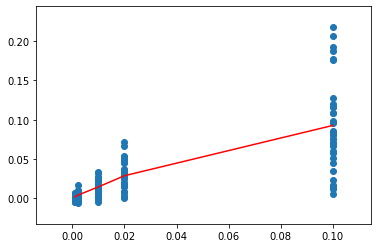

tstat for sample_size_resc -1.8238982072220955
 
 
Change in (Rho_bias) W.R.T (Rho_value)


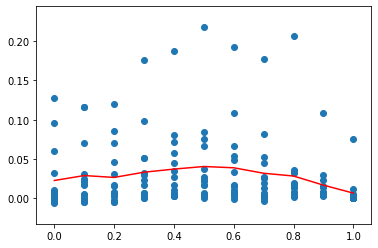

tstat for sample_size_resc -149.70900802597575


In [34]:
print("Change in (Rho_bias) W.R.T (1/sample_size)")
plt.scatter(sim_data["sample_size_resc"],sim_data['Rho_bias'])
plt.plot(sim_data.loc[:,['sample_size_resc','Rho_bias']].groupby(['sample_size_resc']).mean().index,sim_data.loc[:,['sample_size_resc','Rho_bias']].groupby(['sample_size_resc']).mean(),'r')
plt.show()
print ("tstat for sample_size_resc " + str(model_lin.tstat[1]))

print (" " )
print (" " )
print("Change in (Rho_bias) W.R.T (Rho_value)")
plt.scatter(sim_data["Actual_Rho"],sim_data['Rho_bias'])
plt.plot(sim_data.loc[:,['Actual_Rho','Rho_bias']].groupby(['Actual_Rho']).mean().index,sim_data.loc[:,['Actual_Rho','Rho_bias']].groupby(['Actual_Rho']).mean(),'r')
plt.show()
print ("tstat for sample_size_resc " + str(model_lin.tstat[0]))


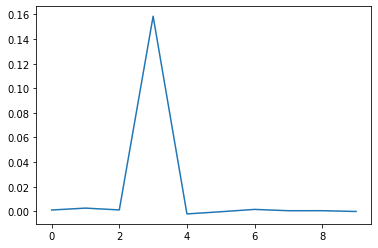

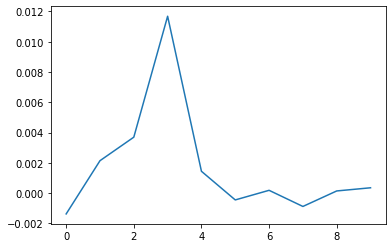

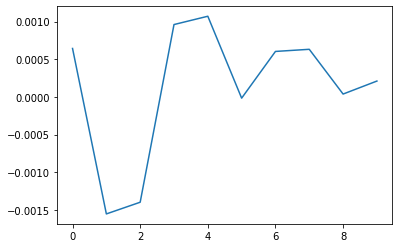

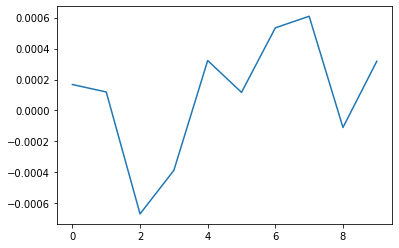

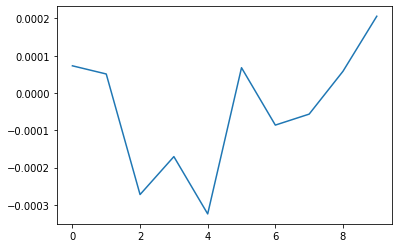

In [10]:
for i in range(5):
    plt.plot(rho-np.array(mean_rho_values)[:,i])
    #plt.plot(rho-np.array(LowerBound_Interval_values)[:,i])
    #plt.plot(rho-np.array(UnperBound_Interval_values)[:,i])
    plt.show()

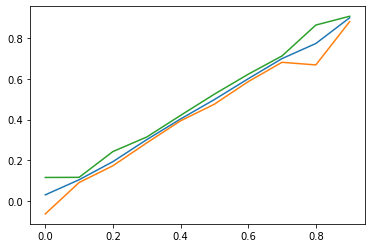

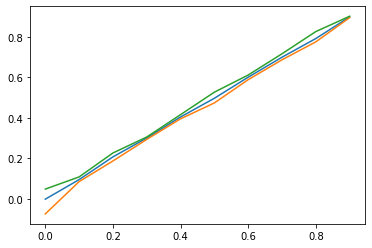

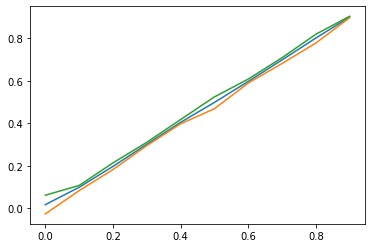

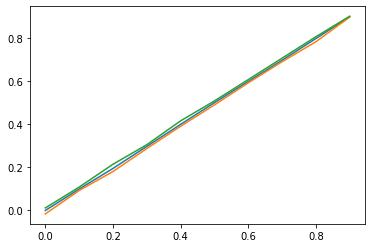

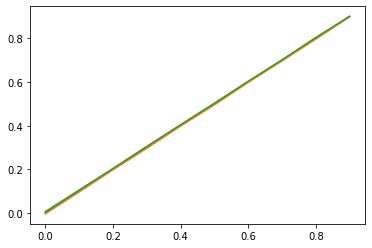

In [9]:
for i in range(5):
    plt.plot(rho,np.array(mean_rho_values)[:,i])
    plt.plot(rho,np.array(LowerBound_Interval_values)[:,i])
    plt.plot(rho,np.array(UnperBound_Interval_values)[:,i])
    plt.show()

In [ ]:
# As the pro value increases var(rho_cap) decreasing

In [ ]:
"""rho = np.array(range(1,20))/20
alpha = np.random.randint(0,100,20)
iterations = 100

rho_all_iterations = []
alpha_all_iterations = []

for it in range(iterations):
    print(it)
    
    sample_sizes = [10,100,1000,10000,100000]
    all_samples_list = [data_generation(i,[rho,alpha]) for i in sample_sizes]


    rho_estimates = []
    alpha_estimates = []

    for s in all_samples_list:
        #print(len(s))
        one_1 = np.ones(len(s))
        x = np.transpose(np.vstack([s,one_1]))
        OLS_model = linear_model(x[:len(s)-1,:],s[1:])
        #print(OLS_model.b[0])
        rho_estimates += [OLS_model.b[0]]
        alpha_estimates += [OLS_model.b[1]]
    
    rho_all_iterations += [rho_estimates]
    alpha_all_iterations += [alpha_estimates]
    """

In [98]:
sample_size

10

In [100]:
[np.sort(np.array(rho_all_iterations)[:,i])[int(0.975*10000)] for i in range(len(sample_sizes))]

[0.3929533189090655,
 0.35629264476303063,
 0.3018445020298026,
 0.2685686025579583,
 0.25591439248530695]

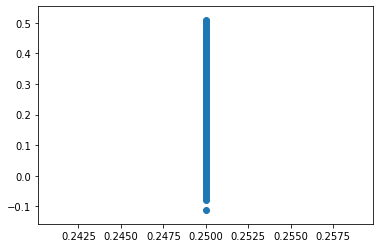

In [80]:
plt.scatter(np.array([0.25]*3),np.array(rho_all_iterations[0.25])[:,0])
plt.show()